## Time Series Prediction

We will be using the [Air Quality Dataset from UCI](https://archive.ics.uci.edu/dataset/360/air+quality) for this project.


In [61]:
## the imports 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

import yfinance as yf

## stat related
import statsmodels.api as sm
import statsmodels

import scipy
from scipy.stats import pearsonr

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

### 1. loading and Visualizing the Data

In [65]:
TICKER = 'AAPL'
data = yf.download(tickers = TICKER, period = '5y', interval='1d')
data.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-05-16,47.477501,48.117500,47.209999,47.520000,45.861420,132125600
2019-05-17,46.732498,47.724998,46.689999,47.250000,45.600838,131516400
2019-05-20,45.880001,46.087502,45.070000,45.772499,44.174911,154449200
2019-05-21,46.305000,47.000000,46.174999,46.650002,45.021778,113459200
2019-05-22,46.165001,46.427502,45.637501,45.695000,44.100113,118994400


In [66]:
## making sure the index is in datetime format
type(data.index)

pandas.core.indexes.datetimes.DatetimeIndex

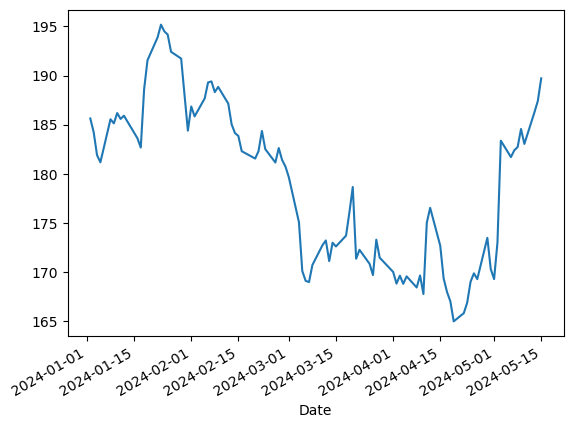

In [68]:
## plotting the 2024 data
data.loc['2024']['Close'].plot();

In [64]:
## checking the Pearson R for close vs Volume
pearsonr(data.Close, data.Volume)

PearsonRResult(statistic=-0.17332506281303106, pvalue=0.005803515377593502)

In [104]:
## starting with a simple model
model_params = {
    'level':'smooth trend',
    'cycle':True,
    'seasonal':250
}
## and then fit the model
model_1 = sm.tsa.UnobservedComponents(data.loc['2022':'2023']['Close'], **model_params)
model_1_res = model_1.fit()

C:\ProgramData\Anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


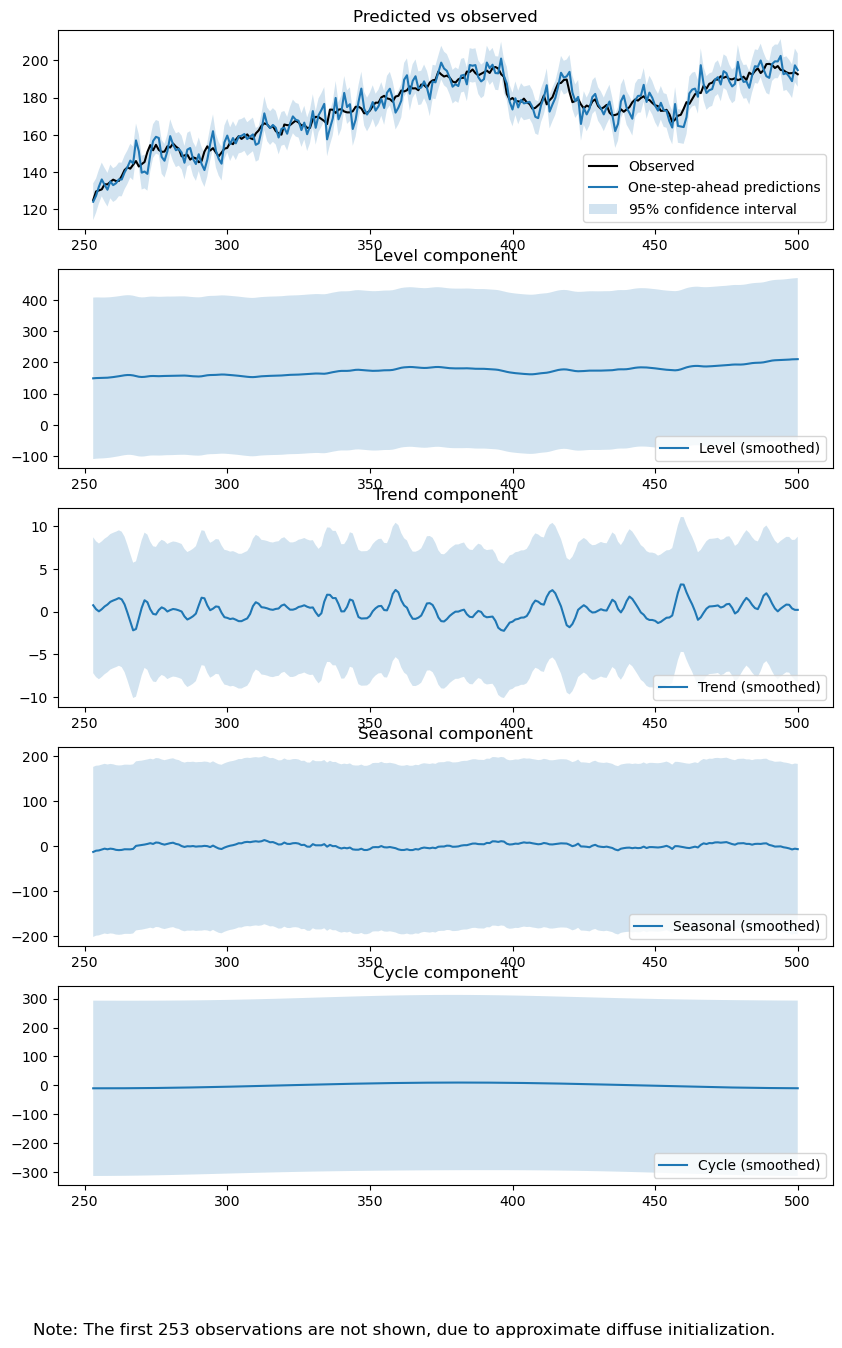

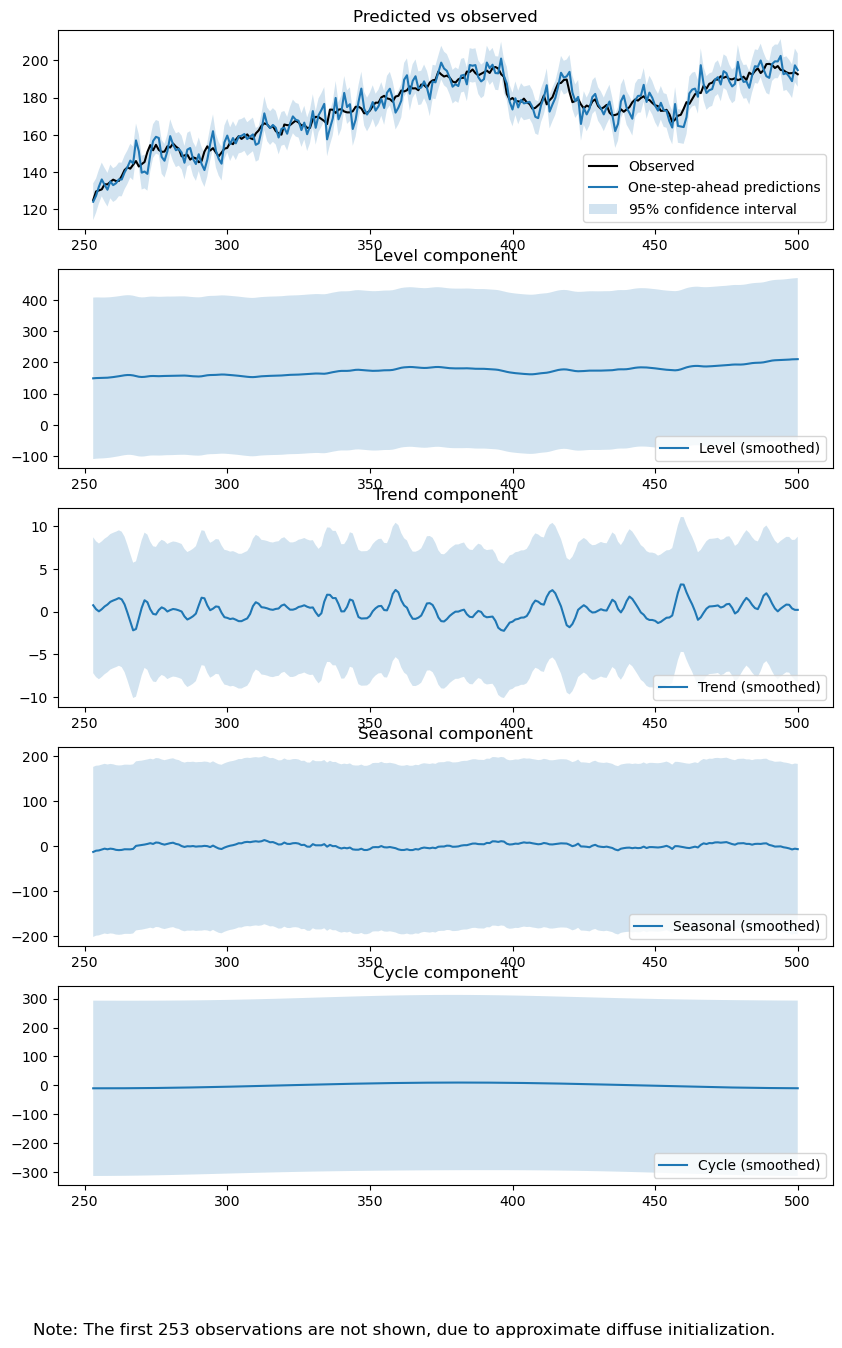

In [105]:
model_1_res.plot_components(legend_loc='lower right',figsize=(10, 15))

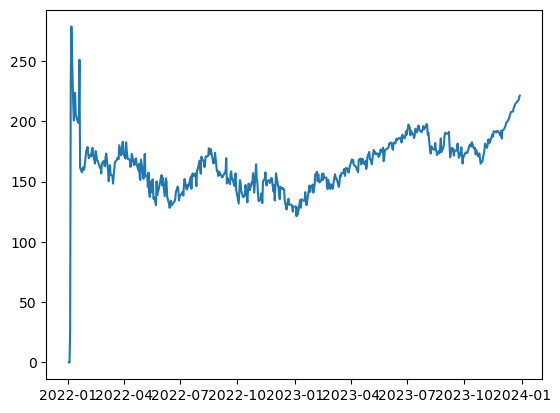

In [103]:
predict_res = model_1_res.get_prediction(dynamic = data.loc['2022':'2023']['Close'].shape[0] - 20)
predict = predict_res.predicted_mean
ci = predict_res.conf_int()

plt.plot(predict);

In [93]:
data.loc['2024']['Close']

Date
2024-01-02    185.639999
2024-01-03    184.250000
2024-01-04    181.910004
2024-01-05    181.179993
2024-01-08    185.559998
                 ...    
2024-05-09    184.570007
2024-05-10    183.050003
2024-05-13    186.279999
2024-05-14    187.429993
2024-05-15    189.720001
Name: Close, Length: 94, dtype: float64

In [48]:
data = pd.read_csv('https://archive.ics.uci.edu/static/public/360/data.csv')
data['Date'] = pd.to_datetime(data['Date'])
data['timestamp'] = data[['Date', 'Time']].astype(str).apply(lambda x:dt.datetime.strptime(x['Date'] +' '+ x['Time'], '%Y-%m-%d %H:%M:%S'), axis=1)
data = data.set_index('timestamp')
data = data.drop(['Date', 'Time'], axis=1)
data.head()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
timestamp,,,,,,,,,,,,,
2004-03-10 18:00:00,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578
2004-03-10 19:00:00,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255
2004-03-10 20:00:00,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502
2004-03-10 21:00:00,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867
2004-03-10 22:00:00,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888


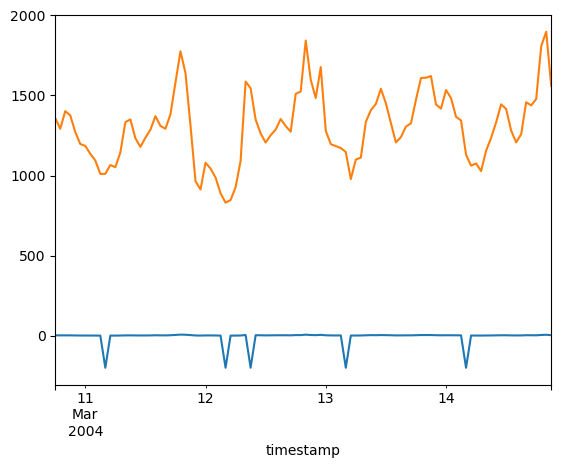

In [57]:
data['CO(GT)'][:100].plot()
data['PT08.S1(CO)'][:100].plot();

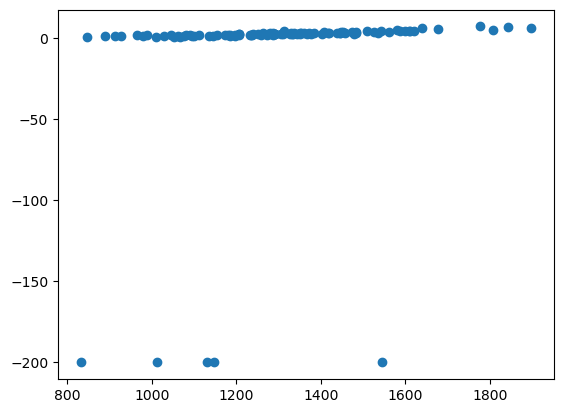

In [59]:
plt.scatter(data[:100]['PT08.S1(CO)'], data[:100]['CO(GT)']);

In [60]:
pearsonr(data[:100]['PT08.S1(CO)'], data[:100]['CO(GT)'])

PearsonRResult(statistic=0.20518243612233422, pvalue=0.040572669178180185)

In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9357 entries, 2004-03-10 18:00:00 to 2005-04-04 14:00:00
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CO(GT)         9357 non-null   float64
 1   PT08.S1(CO)    9357 non-null   int64  
 2   NMHC(GT)       9357 non-null   int64  
 3   C6H6(GT)       9357 non-null   float64
 4   PT08.S2(NMHC)  9357 non-null   int64  
 5   NOx(GT)        9357 non-null   int64  
 6   PT08.S3(NOx)   9357 non-null   int64  
 7   NO2(GT)        9357 non-null   int64  
 8   PT08.S4(NO2)   9357 non-null   int64  
 9   PT08.S5(O3)    9357 non-null   int64  
 10  T              9357 non-null   float64
 11  RH             9357 non-null   float64
 12  AH             9357 non-null   float64
dtypes: float64(5), int64(8)
memory usage: 1023.4 KB
